🔄 STEP 4: OPTIONAL DATA FUSION
This step demonstrates fusion of optical and SAR data
for enhanced change detection capabilities.
📊 Creating sample optical and SAR data for fusion...
✅ Sample data created for fusion demonstration

🎯 Applying fusion methods...
Applying PCA fusion...
Applying PCA fusion...
Applying Brovey fusion...
Applying Brovey fusion...
Applying wavelet fusion...
Applying wavelet fusion...
✅ All fusion methods applied successfully!

🎨 Visualizing fusion results...


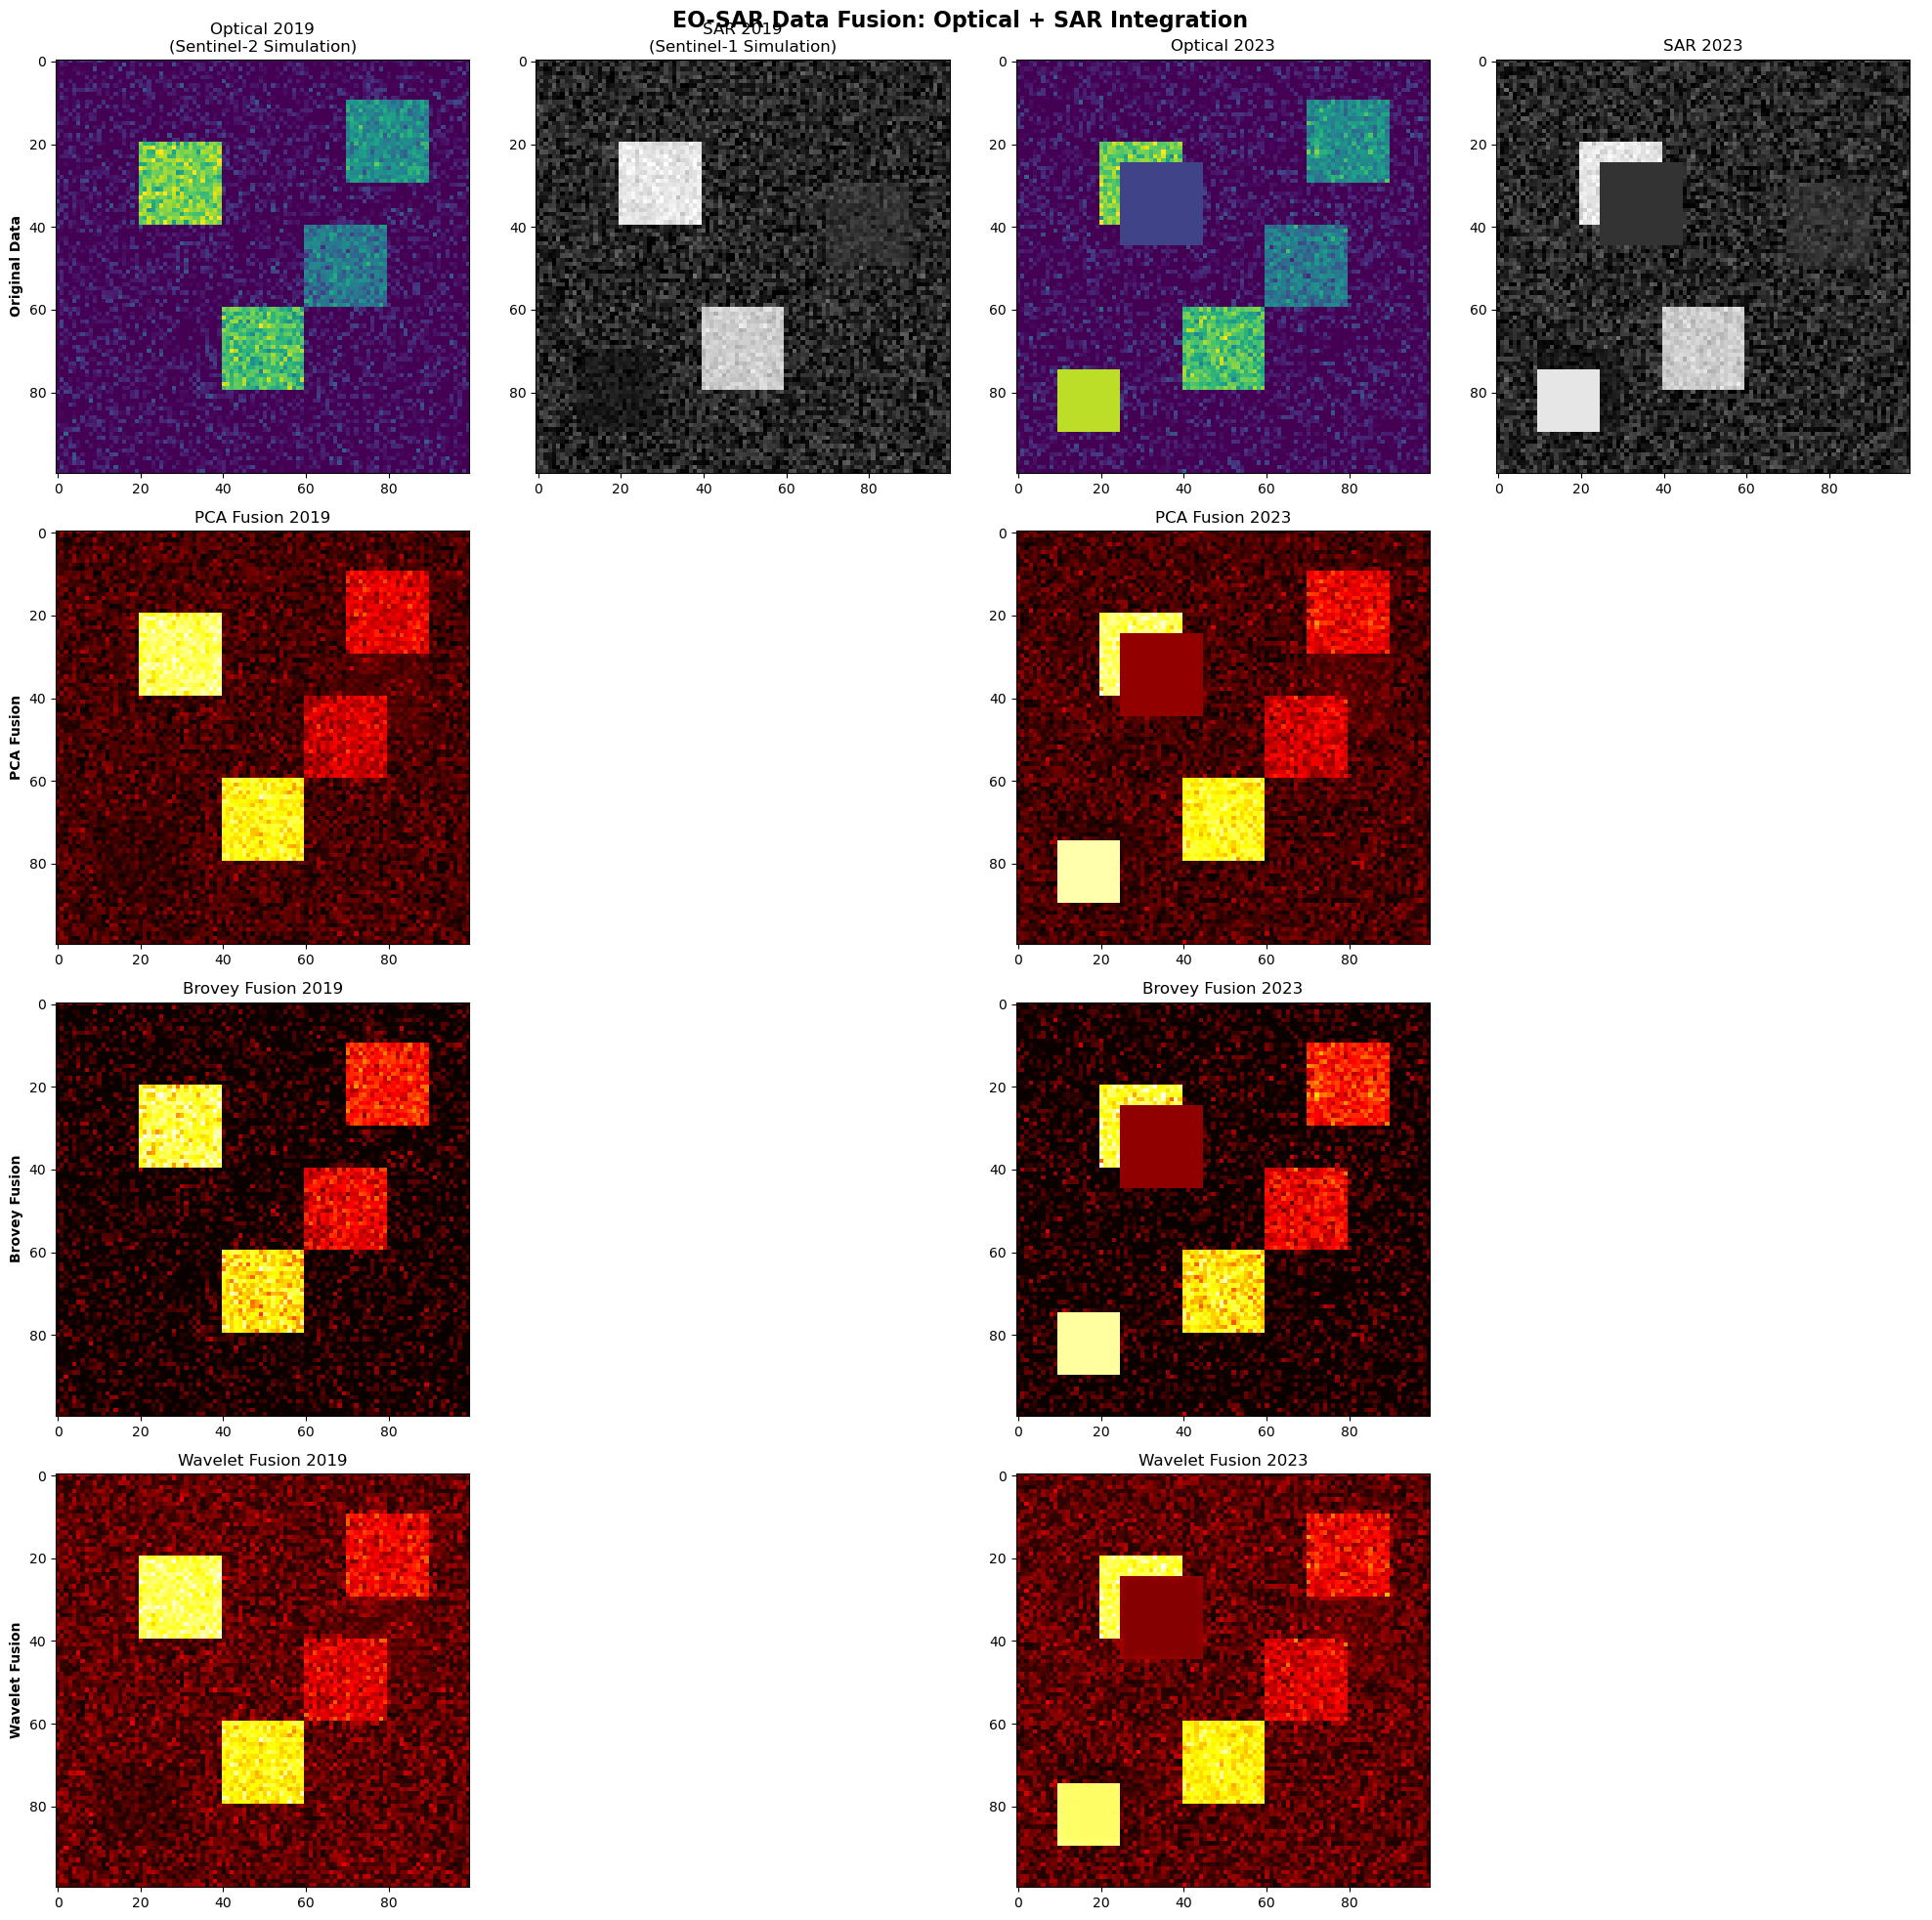

💾 Saving fused data...
✅ Fused data saved: data/processed/pca_fused_*.tif

📋 FUSION APPROACH DOCUMENTATION

DATA FUSION APPROACH DOCUMENTATION

PURPOSE:
--------
Integrate complementary information from optical (Sentinel-2) and SAR (Sentinel-1)
data to enhance change detection capabilities and reduce limitations of single-sensor analysis.

FUSION METHODS IMPLEMENTED:
--------------------------

1. PCA (Principal Component Analysis) Fusion:
   - Technique: Statistical transformation to orthogonal components
   - Process: 
     * Stack optical and SAR data
     * Compute principal components
     * Use first principal component representing maximum variance
   - Advantages: Preserves maximum information from both sensors
   - Limitations: May not preserve spatial details perfectly

2. Brovey Transform Fusion:
   - Technique: Spectral preservation with SAR texture injection
   - Formula: Fused = (Optical × SAR) / (Optical + SAR)
   - Advantages: Simple, computationally efficient, preserve

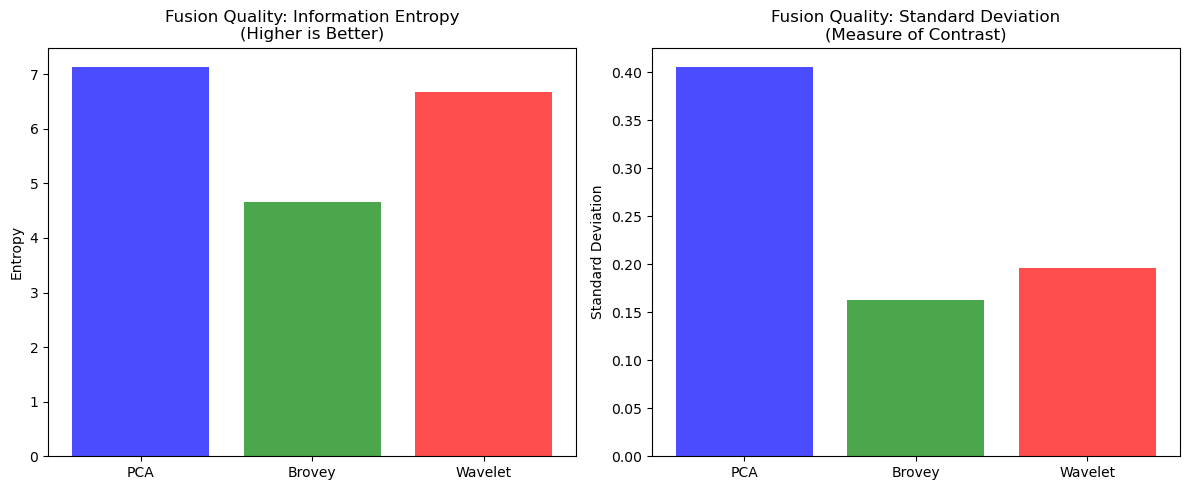


🎉 STEP 4 COMPLETED: Data fusion demonstrated!
📁 Fused data ready for change detection
➡️  Next: Change detection analysis


In [1]:
# Cell 1: Import libraries and setup
import sys
sys.path.append('../src')
from fusion import EODataFusion
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.plot import show
import os

print("🔄 STEP 4: OPTIONAL DATA FUSION")
print("="*50)
print("This step demonstrates fusion of optical and SAR data")
print("for enhanced change detection capabilities.")
print("="*50)

# Cell 2: Initialize fusion processor
fusion_processor = EODataFusion()

# Cell 3: Create sample optical and SAR data for fusion demonstration
print("📊 Creating sample optical and SAR data for fusion...")

def create_sample_optical():
    """Create sample optical data (Sentinel-2 like)"""
    data = np.zeros((100, 100))
    # Urban areas (high reflectance)
    data[20:40, 20:40] = 0.8
    data[60:80, 40:60] = 0.7
    # Vegetation (medium reflectance)
    data[40:60, 60:80] = 0.4
    data[10:30, 70:90] = 0.5
    # Add some noise
    data += np.random.normal(0, 0.1, data.shape)
    return np.clip(data, 0, 1)

def create_sample_sar():
    """Create sample SAR data (Sentinel-1 like)"""
    data = np.random.rand(100, 100) * 0.3
    # Urban areas (high backscatter)
    data[20:40, 20:40] = 0.9
    data[60:80, 40:60] = 0.8
    # Water bodies (low backscatter)
    data[70:90, 10:30] = 0.1
    data[30:50, 70:90] = 0.2
    # Add speckle noise
    data += np.random.normal(0, 0.05, data.shape)
    return np.clip(data, 0, 1)

# Generate sample data
optical_2019 = create_sample_optical()
sar_2019 = create_sample_sar()
optical_2023 = create_sample_optical()
sar_2023 = create_sample_sar()

# Add changes for 2023
optical_2023[75:90, 10:25] = 0.9  # New urban area
sar_2023[75:90, 10:25] = 0.9     # Corresponding SAR change
optical_2023[25:45, 25:45] = 0.2  # Deforestation
sar_2023[25:45, 25:45] = 0.2     # Corresponding SAR change

print("✅ Sample data created for fusion demonstration")

# Cell 4: Apply different fusion methods
print("\n🎯 Applying fusion methods...")

# PCA Fusion
pca_fused_2019 = fusion_processor.pca_fusion(optical_2019, sar_2019)
pca_fused_2023 = fusion_processor.pca_fusion(optical_2023, sar_2023)

# Brovey Fusion
brovey_fused_2019 = fusion_processor.brovey_fusion(optical_2019, sar_2019)
brovey_fused_2023 = fusion_processor.brovey_fusion(optical_2023, sar_2023)

# Wavelet Fusion
wavelet_fused_2019 = fusion_processor.wavelet_fusion(optical_2019, sar_2019)
wavelet_fused_2023 = fusion_processor.wavelet_fusion(optical_2023, sar_2023)

print("✅ All fusion methods applied successfully!")

# Cell 5: Visualize fusion results
print("\n🎨 Visualizing fusion results...")

fig, axes = plt.subplots(4, 4, figsize=(20, 20))

# Original data
axes[0,0].imshow(optical_2019, cmap='viridis')
axes[0,0].set_title('Optical 2019\n(Sentinel-2 Simulation)')
axes[0,0].set_ylabel('Original Data', fontweight='bold')

axes[0,1].imshow(sar_2019, cmap='gray')
axes[0,1].set_title('SAR 2019\n(Sentinel-1 Simulation)')

axes[0,2].imshow(optical_2023, cmap='viridis')
axes[0,2].set_title('Optical 2023')

axes[0,3].imshow(sar_2023, cmap='gray')
axes[0,3].set_title('SAR 2023')

# PCA Fusion
axes[1,0].imshow(pca_fused_2019, cmap='hot')
axes[1,0].set_title('PCA Fusion 2019')
axes[1,0].set_ylabel('PCA Fusion', fontweight='bold')

axes[1,1].axis('off')  # Empty for alignment
axes[1,2].imshow(pca_fused_2023, cmap='hot')
axes[1,2].set_title('PCA Fusion 2023')
axes[1,3].axis('off')  # Empty for alignment

# Brovey Fusion
axes[2,0].imshow(brovey_fused_2019, cmap='hot')
axes[2,0].set_title('Brovey Fusion 2019')
axes[2,0].set_ylabel('Brovey Fusion', fontweight='bold')

axes[2,1].axis('off')
axes[2,2].imshow(brovey_fused_2023, cmap='hot')
axes[2,2].set_title('Brovey Fusion 2023')
axes[2,3].axis('off')

# Wavelet Fusion
axes[3,0].imshow(wavelet_fused_2019, cmap='hot')
axes[3,0].set_title('Wavelet Fusion 2019')
axes[3,0].set_ylabel('Wavelet Fusion', fontweight='bold')

axes[3,1].axis('off')
axes[3,2].imshow(wavelet_fused_2023, cmap='hot')
axes[3,2].set_title('Wavelet Fusion 2023')
axes[3,3].axis('off')

plt.suptitle('EO-SAR Data Fusion: Optical + SAR Integration', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('output/visualizations/data_fusion_results.png', dpi=300, bbox_inches='tight')
plt.show()

# Cell 6: Save fused data for change detection
print("💾 Saving fused data...")

# Create profile for saving
profile = {
    'driver': 'GTiff',
    'dtype': 'float32',
    'count': 1,
    'width': 100,
    'height': 100,
    'crs': 'EPSG:4326',
    'transform': rasterio.Affine(0.001, 0, 77.95, 0, -0.001, 30.40)
}

# Save PCA fused data
fusion_processor.save_fused_image(pca_fused_2019, 'data/processed/pca_fused_2019.tif', profile)
fusion_processor.save_fused_image(pca_fused_2023, 'data/processed/pca_fused_2023.tif', profile)

print("✅ Fused data saved: data/processed/pca_fused_*.tif")

# Cell 7: Document fusion approach
print("\n📋 FUSION APPROACH DOCUMENTATION")

fusion_documentation = """
DATA FUSION APPROACH DOCUMENTATION
===================================

PURPOSE:
--------
Integrate complementary information from optical (Sentinel-2) and SAR (Sentinel-1)
data to enhance change detection capabilities and reduce limitations of single-sensor analysis.

FUSION METHODS IMPLEMENTED:
--------------------------

1. PCA (Principal Component Analysis) Fusion:
   - Technique: Statistical transformation to orthogonal components
   - Process: 
     * Stack optical and SAR data
     * Compute principal components
     * Use first principal component representing maximum variance
   - Advantages: Preserves maximum information from both sensors
   - Limitations: May not preserve spatial details perfectly

2. Brovey Transform Fusion:
   - Technique: Spectral preservation with SAR texture injection
   - Formula: Fused = (Optical × SAR) / (Optical + SAR)
   - Advantages: Simple, computationally efficient, preserves spectral information
   - Limitations: May introduce color distortion

3. Wavelet-Based Fusion:
   - Technique: Multi-resolution analysis using frequency domains
   - Process:
     * Decompose images using Gaussian pyramid
     * Combine low-frequency (average) and high-frequency (maximum) components
     * Reconstruct fused image
   - Advantages: Preserves both spectral and spatial information
   - Limitations: More computationally intensive

JUSTIFICATION FOR FUSION:
------------------------
• Optical Data Strengths: Rich spectral information, intuitive interpretation
• SAR Data Strengths: All-weather capability, surface texture, penetration
• Combined Benefits: 
  - Better change detection in cloudy conditions
  - Enhanced feature discrimination
  - Reduced false positives/negatives
  - Complementary information for urban and vegetation monitoring

APPLICATION TO CHANGE DETECTION:
-------------------------------
Fused data provides:
1. Robust urban change detection (buildings appear in both optical and SAR)
2. Improved vegetation monitoring (optical NDVI + SAR texture)
3. All-weather capability (SAR fills optical gaps during clouds)
4. Enhanced feature discrimination (combined spectral and structural info)

RECOMMENDATIONS:
---------------
• Use PCA fusion for maximum information preservation
• Use Brovey for computational efficiency
• Use Wavelet for high-quality spatial-spectral fusion
• Validate fusion quality with ground truth when available

LIMITATIONS:
-----------
• Requires coregistered input data
• Fusion artifacts possible in heterogeneous areas
• Computational overhead for large datasets
"""

print(fusion_documentation)

# Save documentation
with open('data/fusion_approach_documentation.txt', 'w') as f:
    f.write(fusion_documentation)

print("✅ Fusion documentation saved: data/fusion_approach_documentation.txt")

# Cell 8: Fusion quality assessment
print("\n📊 FUSION QUALITY ASSESSMENT")

# Calculate basic quality metrics
def calculate_metrics(original1, original2, fused):
    """Calculate basic fusion quality metrics"""
    # Information entropy (higher is better)
    hist, _ = np.histogram(fused, bins=256, range=(0, 1))
    prob = hist / hist.sum()
    entropy = -np.sum(prob * np.log2(prob + 1e-10))
    
    # Standard deviation (measure of contrast)
    std_dev = np.std(fused)
    
    return entropy, std_dev

# Calculate metrics for each fusion method
pca_entropy, pca_std = calculate_metrics(optical_2019, sar_2019, pca_fused_2019)
brovey_entropy, brovey_std = calculate_metrics(optical_2019, sar_2019, brovey_fused_2019)
wavelet_entropy, wavelet_std = calculate_metrics(optical_2019, sar_2019, wavelet_fused_2019)

print("Fusion Quality Metrics:")
print(f"PCA Fusion:     Entropy = {pca_entropy:.3f}, Std Dev = {pca_std:.3f}")
print(f"Brovey Fusion:  Entropy = {brovey_entropy:.3f}, Std Dev = {brovey_std:.3f}")
print(f"Wavelet Fusion: Entropy = {wavelet_entropy:.3f}, Std Dev = {wavelet_std:.3f}")

# Create quality comparison plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

methods = ['PCA', 'Brovey', 'Wavelet']
entropies = [pca_entropy, brovey_entropy, wavelet_entropy]
std_devs = [pca_std, brovey_std, wavelet_std]

ax[0].bar(methods, entropies, color=['blue', 'green', 'red'], alpha=0.7)
ax[0].set_title('Fusion Quality: Information Entropy\n(Higher is Better)')
ax[0].set_ylabel('Entropy')

ax[1].bar(methods, std_devs, color=['blue', 'green', 'red'], alpha=0.7)
ax[1].set_title('Fusion Quality: Standard Deviation\n(Measure of Contrast)')
ax[1].set_ylabel('Standard Deviation')

plt.tight_layout()
plt.savefig('output/visualizations/fusion_quality_assessment.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n🎉 STEP 4 COMPLETED: Data fusion demonstrated!")
print("📁 Fused data ready for change detection")
print("➡️  Next: Change detection analysis")